In [1]:
import tensorflow as tf
import pandas as pd
import matplotlib.pyplot as plt

In [6]:
## Define functions that build and train a model

def build_model(my_learning_rate):
    """Create and compile a simple linear regression model."""
    # Most simple tf.keras models are sequential. 
    # A sequential model contains one or more layers.
    model = tf.keras.models.Sequential()

    # Describe the topography of the model.
    # The topography of a simple linear regression model
    # is a single node in a single layer. 
    model.add(tf.keras.layers.Dense(units=1, input_shape=(1,)))

    # Compile the model topography into code that 
    # TensorFlow can efficiently execute. Configure 
    # training to minimize the model's mean squared error. 
    model.compile(optimizer=tf.keras.optimizers.RMSprop(lr=my_learning_rate),
                  loss="mean_squared_error",
                  metrics=[tf.keras.metrics.RootMeanSquaredError()])

    return model           


def train_model(model, feature, label, epochs, batch_size):
    """Train the model by feeding it data."""

    # Feed the feature values and the label values to the 
    # model. The model will train for the specified number 
    # of epochs, gradually learning how the feature values
    # relate to the label values. 
    history = model.fit(x=feature, y=label, batch_size=batch_size, epochs=epochs)

    # Gather the trained model's weight and bias.
    trained_weight = model.get_weights()[0]
    trained_bias = model.get_weights()[1]

    # The list of epochs is stored separately from the 
    # rest of history.
    epochs = history.epoch

    # Gather the history (a snapshot) of each epoch.
    hist = pd.DataFrame(history.history)

    # Specifically gather the model's root mean 
    #squared error at each epoch. 
    rmse = hist["root_mean_squared_error"]

    return trained_weight, trained_bias, epochs, rmse

print("Defined create_model and train_model")

Defined create_model and train_model


In [7]:
def plot_the_model(trained_weight, trained_bias, feature, label):
    """Plot the trained model against the training feature and label."""

    # Label the axes.
    plt.xlabel("feature")
    plt.ylabel("label")

    # Plot the feature values vs. label values.
    plt.scatter(feature, label)

    # Create a red line representing the model. The red line starts
    # at coordinates (x0, y0) and ends at coordinates (x1, y1).
    x0 = 0
    y0 = trained_bias
    x1 = my_feature[-1]
    y1 = trained_bias + (trained_weight * x1)
    plt.plot([x0, x1], [y0, y1], c='r')

    # Render the scatter plot and the red line.
    plt.show()

def plot_the_loss_curve(epochs, rmse):
    """Plot the loss curve, which shows loss vs. epoch."""

    plt.figure()
    plt.xlabel("Epoch")
    plt.ylabel("Root Mean Squared Error")

    plt.plot(epochs, rmse, label="Loss")
    plt.legend()
    plt.ylim([rmse.min()*0.97, rmse.max()])
    plt.show()

print("Defined the plot_the_model and plot_the_loss_curve functions.")

Defined the plot_the_model and plot_the_loss_curve functions.


In [8]:
my_feature = ([1.0, 2.0,  3.0,  4.0,  5.0,  6.0,  7.0,  8.0,  9.0, 10.0, 11.0, 12.0])
my_label   = ([5.0, 8.8,  9.6, 14.2, 18.8, 19.5, 21.4, 26.8, 28.9, 32.0, 33.8, 38.2])

Train on 12 samples
Epoch 1/100
12/12 [==============================] - 0s 15ms/sample - loss: 306.0446 - root_mean_squared_error: 17.4941
Epoch 2/100
12/12 [==============================] - 0s 1ms/sample - loss: 168.5563 - root_mean_squared_error: 12.9829
Epoch 3/100
12/12 [==============================] - 0s 1ms/sample - loss: 92.1935 - root_mean_squared_error: 9.6017
Epoch 4/100
12/12 [==============================] - 0s 1ms/sample - loss: 46.0347 - root_mean_squared_error: 6.7849
Epoch 5/100
12/12 [==============================] - 0s 1ms/sample - loss: 17.9006 - root_mean_squared_error: 4.2309
Epoch 6/100
12/12 [==============================] - 0s 1ms/sample - loss: 5.2842 - root_mean_squared_error: 2.2987
Epoch 7/100
12/12 [==============================] - 0s 1ms/sample - loss: 1.5188 - root_mean_squared_error: 1.2324
Epoch 8/100
12/12 [==============================] - 0s 1ms/sample - loss: 1.1115 - root_mean_squared_error: 1.0543
Epoch 9/100
12/12 [=======================

12/12 [==============================] - 0s 1ms/sample - loss: 1.1541 - root_mean_squared_error: 1.0743
Epoch 71/100
12/12 [==============================] - 0s 1ms/sample - loss: 1.1438 - root_mean_squared_error: 1.0695
Epoch 72/100
12/12 [==============================] - 0s 1ms/sample - loss: 1.1790 - root_mean_squared_error: 1.0858
Epoch 73/100
12/12 [==============================] - 0s 1ms/sample - loss: 1.1602 - root_mean_squared_error: 1.0771
Epoch 74/100
12/12 [==============================] - 0s 1ms/sample - loss: 1.1431 - root_mean_squared_error: 1.0692
Epoch 75/100
12/12 [==============================] - 0s 1ms/sample - loss: 1.1730 - root_mean_squared_error: 1.0831
Epoch 76/100
12/12 [==============================] - 0s 1ms/sample - loss: 1.0896 - root_mean_squared_error: 1.0438
Epoch 77/100
12/12 [==============================] - 0s 1ms/sample - loss: 1.0638 - root_mean_squared_error: 1.0314
Epoch 78/100
12/12 [==============================] - 0s 1ms/sample - loss: 1

C:\Users\marci\anaconda3\envs\tf\lib\site-packages\numpy\core\_asarray.py:136: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return array(a, dtype, copy=False, order=order, subok=True)


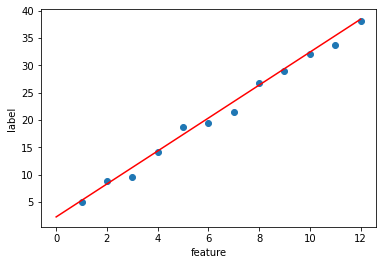

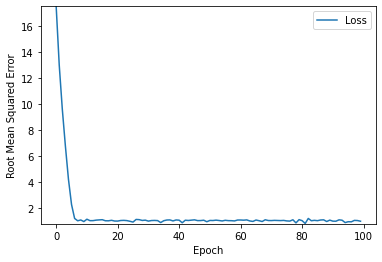

In [18]:
learning_rate=0.05
epochs=100
my_batch_size=1

my_model = build_model(learning_rate)
trained_weight, trained_bias, epochs, rmse = train_model(my_model, my_feature, 
                                                         my_label, epochs,
                                                         my_batch_size)
plot_the_model(trained_weight, trained_bias, my_feature, my_label)
plot_the_loss_curve(epochs, rmse)

In [20]:
# Import the dataset.
training_df = pd.read_csv(filepath_or_buffer="https://download.mlcc.google.com/mledu-datasets/california_housing_train.csv")

# Scale the label.
training_df["median_house_value"] /= 1000.0

# Print the first rows of the pandas DataFrame.
training_df.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
0,-114.31,34.19,15.0,5612.0,1283.0,1015.0,472.0,1.4936,66.9
1,-114.47,34.40,19.0,7650.0,1901.0,1129.0,463.0,1.8200,80.1
2,-114.56,33.69,17.0,720.0,174.0,333.0,117.0,1.6509,85.7
3,-114.57,33.64,14.0,1501.0,337.0,515.0,226.0,3.1917,73.4
4,-114.57,33.57,20.0,1454.0,326.0,624.0,262.0,1.9250,65.5


In [21]:
training_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17000 entries, 0 to 16999
Data columns (total 9 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           17000 non-null  float64
 1   latitude            17000 non-null  float64
 2   housing_median_age  17000 non-null  float64
 3   total_rooms         17000 non-null  float64
 4   total_bedrooms      17000 non-null  float64
 5   population          17000 non-null  float64
 6   households          17000 non-null  float64
 7   median_income       17000 non-null  float64
 8   median_house_value  17000 non-null  float64
dtypes: float64(9)
memory usage: 1.2 MB


In [23]:
training_df.describe().T

,count,mean,std,min,25%,50%,75%,max
longitude,17000.0,-119.562108,2.005166,-124.3500,-121.790000,-118.4900,-118.000,-114.3100
latitude,17000.0,35.625225,2.137340,32.5400,33.930000,34.2500,37.720,41.9500
housing_median_age,17000.0,28.589353,12.586937,1.0000,18.000000,29.0000,37.000,52.0000
total_rooms,17000.0,2643.664412,2179.947071,2.0000,1462.000000,2127.0000,3151.250,37937.0000
total_bedrooms,17000.0,539.410824,421.499452,1.0000,297.000000,434.0000,648.250,6445.0000
population,17000.0,1429.573941,1147.852959,3.0000,790.000000,1167.0000,1721.000,35682.0000
households,17000.0,501.221941,384.520841,1.0000,282.000000,409.0000,605.250,6082.0000
median_income,17000.0,3.883578,1.908157,0.4999,2.566375,3.5446,4.767,15.0001
median_house_value,17000.0,207.300912,115.983764,14.9990,119.400000,180.4000,265.000,500.0010


In [25]:
def train_model_df(model, df, feature, label, epochs, batch_size):
    """Train the model by feeding it data."""
    history = model.fit(x=df[feature],
                        y=df[label],
                        batch_size=batch_size,
                        epochs=epochs)

    # Gather the trained model's weight and bias.
    trained_weight = model.get_weights()[0]
    trained_bias = model.get_weights()[1]

    # The list of epochs is stored separately from the rest of history.
    epochs = history.epoch

    # Isolate the error for each epoch.
    hist = pd.DataFrame(history.history)

    # To track the progression of training, we're going to take a snapshot
    # of the model's root mean squared error at each epoch. 
    rmse = hist["root_mean_squared_error"]

    return trained_weight, trained_bias, epochs, rmse

print("Defined the create_model and traing_model functions.")

Defined the create_model and traing_model functions.


In [27]:
def plot_the_model(trained_weight, trained_bias, feature, label):
    """Plot the trained model against 200 random training examples."""
    # Label the axes.
    plt.xlabel(feature)
    plt.ylabel(label)
    # Create a scatter plot from 200 random points of the dataset.
    random_examples = training_df.sample(n=200)
    plt.scatter(random_examples[feature], random_examples[label])

    # Create a red line representing the model. The red line starts
    # at coordinates (x0, y0) and ends at coordinates (x1, y1).
    x0 = 0
    y0 = trained_bias
    x1 = 10000
    y1 = trained_bias + (trained_weight * x1)
    plt.plot([x0, x1], [y0, y1], c='r')

    # Render the scatter plot and the red line.
    plt.show()


def plot_the_loss_curve(epochs, rmse):
    """Plot a curve of loss vs. epoch."""

    plt.figure()
    plt.xlabel("Epoch")
    plt.ylabel("Root Mean Squared Error")

    plt.plot(epochs, rmse, label="Loss")
    plt.legend()
    plt.ylim([rmse.min()*0.97, rmse.max()])
    plt.show()  

    print("Defined the plot_the_model and plot_the_loss_curve functions.")

Train on 17000 samples
Epoch 1/30
17000/17000 [==============================] - 1s 40us/sample - loss: 32087.0517 - root_mean_squared_error: 179.1286
Epoch 2/30
17000/17000 [==============================] - 1s 30us/sample - loss: 27882.6839 - root_mean_squared_error: 166.9811
Epoch 3/30
17000/17000 [==============================] - 0s 29us/sample - loss: 26952.9515 - root_mean_squared_error: 164.1735
Epoch 4/30
17000/17000 [==============================] - 0s 28us/sample - loss: 26388.0283 - root_mean_squared_error: 162.4439
Epoch 5/30
17000/17000 [==============================] - 0s 28us/sample - loss: 25755.9107 - root_mean_squared_error: 160.4865
Epoch 6/30
17000/17000 [==============================] - 0s 29us/sample - loss: 24815.8108 - root_mean_squared_error: 157.5303
Epoch 7/30
17000/17000 [==============================] - 0s 29us/sample - loss: 24274.8360 - root_mean_squared_error: 155.8038
Epoch 8/30
17000/17000 [==============================] - 0s 29us/sample - loss: 

C:\Users\marci\anaconda3\envs\tf\lib\site-packages\numpy\core\_asarray.py:136: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return array(a, dtype, copy=False, order=order, subok=True)


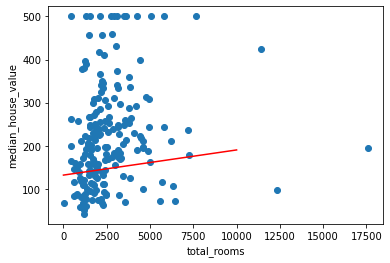

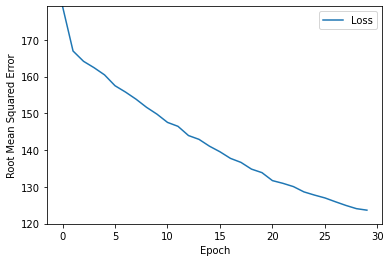

Defined the plot_the_model and plot_the_loss_curve functions.


In [28]:
# The following variables are the hyperparameters.
learning_rate = 0.01
epochs = 30
batch_size = 30

# Specify the feature and the label.
my_feature = "total_rooms"  # the total number of rooms on a specific city block.
my_label="median_house_value" # the median value of a house on a specific city block.

# Discard any pre-existing version of the model.
my_model = None

# Invoke the functions.
my_model = build_model(learning_rate)
weight, bias, epochs, rmse = train_model_df(my_model, training_df, 
                                            my_feature, my_label,
                                            epochs, batch_size)

print("\nThe learned weight for your model is %.4f" % weight)
print("The learned bias for your model is %.4f\n" % bias )

plot_the_model(weight, bias, my_feature, my_label)
plot_the_loss_curve(epochs, rmse)

In [29]:
def predict_house_values(n, feature, label):
    """Predict house values based on a feature."""
    batch = training_df[feature][10000:10000 + n]
    predicted_values = my_model.predict_on_batch(x=batch)

    print("feature   label          predicted")
    print("  value   value          value")
    print("          in thousand$   in thousand$")
    print("--------------------------------------")
    for i in range(n):
        print ("%5.0f %6.0f %15.0f" % (training_df[feature][10000 + i],
                                       training_df[label][10000 + i],
                                       predicted_values[i][0] ))

In [30]:
predict_house_values(10, my_feature, my_label)

feature   label          predicted
  value   value          value
          in thousand$   in thousand$
--------------------------------------
 1960     53             144
 3400     92             152
 3677     69             154
 2202     62             145
 2403     80             147
 5652    295             165
 3318    500             152
 2552    342             147
 1364    118             141
 3468    128             153


Train on 17000 samples
Epoch 1/18
17000/17000 [==============================] - 5s 309us/sample - loss: 29185.1799 - root_mean_squared_error: 170.8367
Epoch 2/18
17000/17000 [==============================] - 5s 280us/sample - loss: 19511.6735 - root_mean_squared_error: 139.6841
Epoch 3/18
17000/17000 [==============================] - 5s 283us/sample - loss: 18534.6854 - root_mean_squared_error: 136.1423
Epoch 4/18
17000/17000 [==============================] - 5s 285us/sample - loss: 18005.0715 - root_mean_squared_error: 134.1830
Epoch 5/18
17000/17000 [==============================] - 5s 285us/sample - loss: 18046.5072 - root_mean_squared_error: 134.3372
Epoch 6/18
17000/17000 [==============================] - 5s 287us/sample - loss: 18256.1597 - root_mean_squared_error: 135.1153s - loss: 18498.5105 - root_mean_sq
Epoch 7/18
17000/17000 [==============================] - 5s 286us/sample - loss: 18282.7289 - root_mean_squared_error: 135.2135
Epoch 8/18
17000/17000 [===============

C:\Users\marci\anaconda3\envs\tf\lib\site-packages\numpy\core\_asarray.py:136: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return array(a, dtype, copy=False, order=order, subok=True)


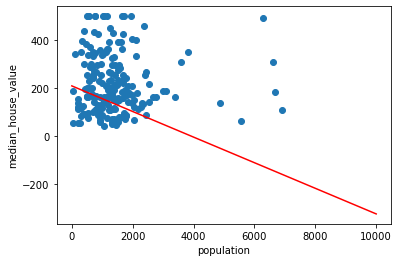

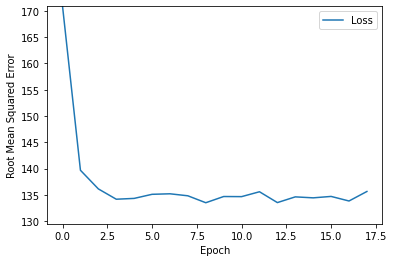

Defined the plot_the_model and plot_the_loss_curve functions.
feature   label          predicted
  value   value          value
          in thousand$   in thousand$
--------------------------------------
 1286     53             141
 1867     92             110
 2191     69              93
 1052     62             154
 1647     80             122
 2312    295              87
 1604    500             125
 1066    342             153
  338    118             192
 1604    128             125
 1200    187             146
  292     80             194
 2014    112             103
 1817     95             113
 1328     69             139


In [37]:
my_feature = 'population'

# Experiment with the hyperparameters.
learning_rate = 0.05
epochs = 18
batch_size = 3

# Don't change anything below this line.
my_model = build_model(learning_rate)
weight, bias, epochs, rmse = train_model_df(my_model, training_df, 
                                            my_feature, my_label,
                                            epochs, batch_size)
plot_the_model(weight, bias, my_feature, my_label)
plot_the_loss_curve(epochs, rmse)

predict_house_values(15, my_feature, my_label)

Train on 17000 samples
Epoch 1/24
17000/17000 [==============================] - 1s 42us/sample - loss: 38242.8599 - root_mean_squared_error: 195.5578
Epoch 2/24
17000/17000 [==============================] - 1s 32us/sample - loss: 19272.8625 - root_mean_squared_error: 138.82680s - loss: 23285.6554 - root_mean_squared_error: 1
Epoch 3/24
17000/17000 [==============================] - 0s 29us/sample - loss: 15126.1835 - root_mean_squared_error: 122.9886
Epoch 4/24
17000/17000 [==============================] - 0s 29us/sample - loss: 14862.0309 - root_mean_squared_error: 121.9099
Epoch 5/24
17000/17000 [==============================] - 1s 30us/sample - loss: 14656.6817 - root_mean_squared_error: 121.0648
Epoch 6/24
17000/17000 [==============================] - 0s 29us/sample - loss: 14505.2579 - root_mean_squared_error: 120.4378
Epoch 7/24
17000/17000 [==============================] - 0s 29us/sample - loss: 14342.5927 - root_mean_squared_error: 119.7606
Epoch 8/24
17000/17000 [=======

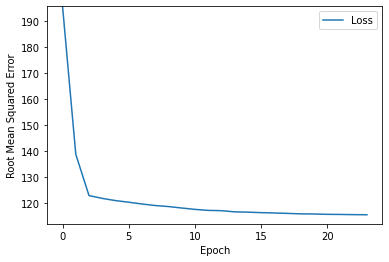

Defined the plot_the_model and plot_the_loss_curve functions.
feature   label          predicted
  value   value          value
          in thousand$   in thousand$
--------------------------------------
    2     53             189
    2     92             200
    2     69             195
    2     62             211
    1     80             186
    2    295             225
    2    500             210
    2    342             223
    4    118             287
    2    128             213
    2    187             224
    3     80             234
    2    112             224
    2     95             219
    2     69             210


In [39]:
# Define a synthetic feature
training_df["rooms_per_person"] = training_df["total_rooms"] / training_df["population"]
my_feature = "rooms_per_person"

# Tune the hyperparameters.
learning_rate = 0.06
epochs = 24
batch_size = 30

# Don't change anything below this line.
my_model = build_model(learning_rate)
weight, bias, epochs, mae = train_model_df(my_model, training_df,
                                           my_feature, my_label,
                                           epochs, batch_size)

plot_the_loss_curve(epochs, mae)
predict_house_values(15, my_feature, my_label)

In [59]:
# Generate a correlation matrix.
training_df.corr()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,rooms_per_person
longitude,1.000000,-0.925208,-0.114250,0.047010,0.071802,0.101674,0.059628,-0.015485,-0.044982,-0.077773
latitude,-0.925208,1.000000,0.016454,-0.038773,-0.069373,-0.111261,-0.074902,-0.080303,-0.144917,0.143017
housing_median_age,-0.114250,0.016454,1.000000,-0.360984,-0.320434,-0.295890,-0.302754,-0.115932,0.106758,-0.103655
total_rooms,0.047010,-0.038773,-0.360984,1.000000,0.928403,0.860170,0.919018,0.195383,0.130991,0.121001
total_bedrooms,0.071802,-0.069373,-0.320434,0.928403,1.000000,0.881169,0.980920,-0.013495,0.045783,0.047811
population,0.101674,-0.111261,-0.295890,0.860170,0.881169,1.000000,0.909247,-0.000638,-0.027850,-0.140277
households,0.059628,-0.074902,-0.302754,0.919018,0.980920,0.909247,1.000000,0.007644,0.061031,-0.034049
median_income,-0.015485,-0.080303,-0.115932,0.195383,-0.013495,-0.000638,0.007644,1.000000,0.691871,0.232667
median_house_value,-0.044982,-0.144917,0.106758,0.130991,0.045783,-0.027850,0.061031,0.691871,1.000000,0.206969
rooms_per_person,-0.077773,0.143017,-0.103655,0.121001,0.047811,-0.140277,-0.034049,0.232667,0.206969,1.000000


Train on 17000 samples
Epoch 1/24
17000/17000 [==============================] - 1s 41us/sample - loss: 49518.9690 - root_mean_squared_error: 222.5286
Epoch 2/24
17000/17000 [==============================] - 1s 30us/sample - loss: 37685.2415 - root_mean_squared_error: 194.1269
Epoch 3/24
17000/17000 [==============================] - 0s 29us/sample - loss: 28337.0367 - root_mean_squared_error: 168.3361
Epoch 4/24
17000/17000 [==============================] - 0s 28us/sample - loss: 21281.3016 - root_mean_squared_error: 145.8811
Epoch 5/24
17000/17000 [==============================] - 0s 29us/sample - loss: 16676.1837 - root_mean_squared_error: 129.13630s - loss: 17406.3683 - root_mean_squared_error: 131.
Epoch 6/24
17000/17000 [==============================] - 0s 28us/sample - loss: 14328.5973 - root_mean_squared_error: 119.7022
Epoch 7/24
17000/17000 [==============================] - 1s 30us/sample - loss: 13689.5946 - root_mean_squared_error: 117.0026
Epoch 8/24
17000/17000 [====

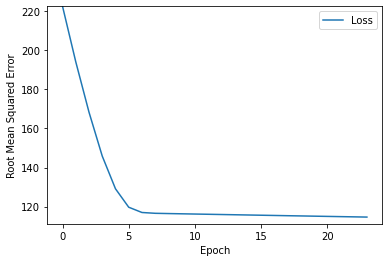

Defined the plot_the_model and plot_the_loss_curve functions.
feature   label          predicted
  value   value          value
          in thousand$   in thousand$
--------------------------------------
    0     53             202
    0     92             201
    0     69             203
    0     62             204
    0     80             204
    0    295             211
    0    500             208
    0    342             209
    0    118             208
    0    128             204
    0    187             201
    0     80             203
    0    112             205
    0     95             201
    0     69             204


In [60]:
# Define a synthetic feature
training_df["income_to_house_value"] = training_df["median_income"] / training_df["median_house_value"]
my_feature = "income_to_house_value"

# Tune the hyperparameters.
learning_rate = 0.06
epochs = 24
batch_size = 30

# Don't change anything below this line.
my_model = build_model(learning_rate)
weight, bias, epochs, mae = train_model_df(my_model, training_df,
                                           my_feature, my_label,
                                           epochs, batch_size)

plot_the_loss_curve(epochs, mae)
predict_house_values(15, my_feature, my_label)